## A1.2 Regresión lineal: Felicidad y GDP
Esta actividad consiste en la elaboración de un reporte técnico de aprendizaje estadístico-automático a partir de un conjunto de datos internacionales sobre el nivel de felicidad y diversos indicadores económicos y sociales. El objetivo es analizar el conjunto de datos de manera integral, comenzando con una exploración inicial de la información disponible y una reflexión crítica sobre las limitaciones de explicar el bienestar social a partir de una sola variable. Posteriormente, se define el nivel de felicidad como la variable de interés para inferencia y se estudia su relación con el producto interno bruto (GDP) mediante un modelo de regresión lineal simple. Finalmente, el análisis se extiende a un enfoque de regresión lineal múltiple, incorporando variables adicionales como la esperanza de vida, el índice de corrupción y el índice de Gini, con el fin de evaluar de forma más realista los factores que influyen en la felicidad a nivel país.
### Introduccion
La felicidad se ha convertido en un indicador clave para evaluar el bienestar de las sociedades, ya que integra dimensiones económicas, sociales y de salud más allá de las métricas tradicionales de desarrollo. A partir de este enfoque, el World Happiness Report proporciona estimaciones comparables del nivel de felicidad promedio en distintos países, lo que permite analizar los factores que influyen en el bienestar social.

Uno de los factores más estudiados en relación con la felicidad es el producto interno bruto (GDP), debido a su asociación con las condiciones materiales de vida. No obstante, la felicidad es un fenómeno complejo que no puede explicarse únicamente a partir del desempeño económico, por lo que resulta necesario considerar variables adicionales como la salud, la desigualdad y la calidad institucional.

En este estudio se analiza la relación entre el nivel de felicidad y el GDP mediante un modelo de regresión lineal simple, y posteriormente se amplía el análisis a un modelo de regresión lineal múltiple que incorpora variables como la esperanza de vida, el índice de corrupción y el índice de Gini, con el objetivo de evaluar si la inclusión de múltiples factores mejora la capacidad explicativa del modelo.
### Metodologia 
El presente estudio se desarrolla a partir de “A1.2 Felicidad y GDP”, un conjunto de datos que reúne información sobre el nivel de felicidad y diversos indicadores económicos y sociales para distintos países. Como primer paso, se llevó a cabo un proceso de preparación de los datos con el objetivo de asegurar la consistencia de la información, eliminando registros duplicados y unificando las variables relevantes en una sola estructura de datos.

Posteriormente, se realizó una exploración inicial del conjunto de datos con el fin de comprender su organización, identificar patrones generales y evaluar las escalas de las variables consideradas. Para ello, se emplearon herramientas computacionales que permitieron cargar y visualizar la información disponible, verificando que cada observación correspondiera a un país distinto y que las variables de interés estuvieran correctamente definidas.

In [14]:
import pandas as pd

df = pd.read_csv("A1.2 Felicidad y GDP.csv")
df.head()

,Pais,Felicidad,GDP
0,Finland,7.8210,2.718370e+11
1,Denmark,7.6362,3.560850e+11
2,Iceland,7.5575,2.171808e+10
3,Switzerland,7.5116,7.522480e+11
4,Netherlands,7.4149,9.138650e+11


Una vez confirmada la estructura del conjunto de datos, se examinó la información general de las variables, así como la ausencia de valores faltantes en aquellas utilizadas para el análisis.

In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pais       141 non-null    object 
 1   Felicidad  141 non-null    float64
 2   GDP        141 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.4+ KB


A continuación, se calcularon estadísticos descriptivos básicos con el propósito de conocer el rango y la dispersión de las variables numéricas. Este análisis permitió identificar diferencias significativas de escala, particularmente en el producto interno bruto (GDP), el cual presenta variaciones considerables entre países.

In [16]:
df.describe()


,Felicidad,GDP
count,141.000000,1.410000e+02
mean,5.560004,5.889942e+11
std,1.098011,2.221612e+12
min,2.403800,1.223876e+09
25%,4.887900,1.805117e+10
50%,5.585300,6.215800e+10
75%,6.309100,3.452960e+11
max,7.821000,2.089370e+13


Dado que el objetivo inicial del estudio es analizar la relación entre la felicidad y el GDP, se realizó un análisis gráfico exploratorio de ambas variables mediante una gráfica de dispersión. Esta representación permitió observar una tendencia general positiva entre el nivel de felicidad y el desempeño económico, aunque también evidenció una dispersión importante en los datos.

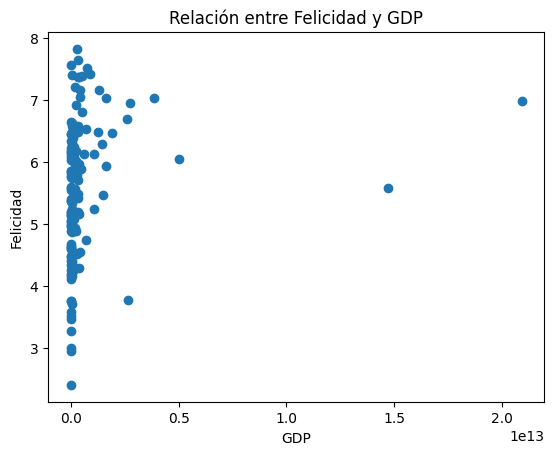

In [17]:
import matplotlib.pyplot as plt

plt.scatter(df["GDP"], df["Felicidad"])
plt.xlabel("GDP")
plt.ylabel("Felicidad")
plt.title("Relación entre Felicidad y GDP")
plt.show()


Los resultados de esta exploración preliminar justifican el planteamiento de un modelo de regresión lineal simple que relacione el nivel de felicidad con el GDP, el cual se desarrolla en la sección siguiente. Asimismo, la variabilidad observada sugiere la necesidad de extender el análisis hacia un modelo de regresión lineal múltiple que incorpore variables adicionales con el fin de capturar de manera más completa los factores que influyen en el bienestar social.
### Regresión lineal simple
Con base en la exploración gráfica previa, se procede a analizar de manera formal la relación entre el nivel de felicidad y el producto interno bruto (GDP). Para ello, se plantea un modelo de regresión lineal simple en el que la felicidad es tratada como la variable de respuesta, mientras que el GDP se considera la variable explicativa. Este enfoque permite cuantificar la asociación entre ambas variables y evaluar si el desempeño económico de un país está relacionado con su nivel promedio de felicidad.

El modelo propuesto asume una relación lineal entre las variables y se expresa como:
Felicidad=β0​+β1​⋅GDP+ε
donde 𝛽0 corresponde al valor esperado de la felicidad cuando el GDP es cero, 𝛽1 representa el cambio promedio en el nivel de felicidad ante un incremento unitario en el GDP, y 𝜀 es el término de error que recoge la variabilidad no explicada por el modelo.

La estimación de los parámetros se realizó mediante el método de mínimos cuadrados ordinarios, utilizando herramientas computacionales para ajustar el modelo a los datos observados.

In [18]:
import statsmodels.api as sm

X = df["GDP"]
y = df["Felicidad"]

X = sm.add_constant(X)

modelo_simple = sm.OLS(y, X).fit()
modelo_simple.summary()
print("RESULTADOS RELEVANTES DEL MODELO DE REGRESIÓN LINEAL SIMPLE\n")

print(f"Número de observaciones: {int(modelo_simple.nobs)}")
print(f"R²: {modelo_simple.rsquared:.3f}")
print(f"R² ajustado: {modelo_simple.rsquared_adj:.3f}")
print(f"Estadístico F: {modelo_simple.fvalue:.3f}")
print(f"p-valor (F-statistic): {modelo_simple.f_pvalue:.4f}\n")

coef = modelo_simple.params
pvals = modelo_simple.pvalues

print("Coeficientes del modelo:")
print(f"Intercepto (β₀): {coef['const']:.3f}  | p-valor: {pvals['const']:.4f}")
print(f"GDP (β₁): {coef['GDP']:.3e} | p-valor: {pvals['GDP']:.4f}")



RESULTADOS RELEVANTES DEL MODELO DE REGRESIÓN LINEAL SIMPLE

Número de observaciones: 141
R²: 0.030
R² ajustado: 0.023
Estadístico F: 4.246
p-valor (F-statistic): 0.0412

Coeficientes del modelo:
Intercepto (β₀): 5.510  | p-valor: 0.0000
GDP (β₁): 8.509e-14 | p-valor: 0.0412


A partir del modelo de regresión lineal simple estimado, se observa que el análisis se realizó con un total de 141 países. El coeficiente de determinación obtenido (𝑅2=0.030) indica que el GDP explica aproximadamente el 3% de la variabilidad observada en el nivel de felicidad, lo cual sugiere una capacidad explicativa limitada cuando se considera únicamente esta variable económica.

No obstante, el modelo resulta estadísticamente significativo a un nivel de significancia del 5%, como lo indica el estadístico F y su correspondiente valor p (p=0.0412). El coeficiente asociado al GDP presenta un valor positivo, lo que sugiere que incrementos en el GDP están asociados, en promedio, con mayores niveles de felicidad.

A pesar de esta asociación positiva y estadísticamente significativa, el bajo valor de 𝑅2 evidencia que el GDP por sí solo no es suficiente para explicar el nivel de felicidad de los países, lo cual justifica la necesidad de extender el análisis incorporando variables adicionales en un modelo de regresión lineal múltiple.

## Extensión del conjunto de datos

Si bien el análisis previo permitió identificar una relación estadísticamente significativa entre la felicidad y el GDP, los resultados obtenidos evidenciaron una capacidad explicativa limitada del modelo de regresión lineal simple. Esto sugiere que el nivel de felicidad de un país no depende únicamente de su desempeño económico, sino que está influido por múltiples factores de carácter social, institucional y de bienestar.

Con el objetivo de capturar de manera más realista la complejidad del fenómeno analizado, se extendió el conjunto de datos original incorporando variables adicionales consideradas relevantes desde un punto de vista teórico y empírico. Estas variables fueron seleccionadas a partir de fuentes públicas y confiables, y se integraron a una base de datos depurada que contiene una observación por país.

### Descripción de las variables adicionales

La primera variable incorporada es la esperanza de vida, la cual refleja el estado general de salud y las condiciones de vida de la población. Este indicador resume factores como el acceso a servicios médicos, la nutrición y la calidad del entorno, los cuales están estrechamente relacionados con el bienestar individual y colectivo.

La segunda variable considerada es el índice de corrupción, el cual mide la percepción de corrupción en el sector público. Este indicador se utiliza como una aproximación a la calidad institucional y al nivel de confianza en las instituciones de un país. Una menor percepción de corrupción suele asociarse con mayor estabilidad social y mayor satisfacción con la vida.

Finalmente, se incorporó el índice de Gini, una medida ampliamente utilizada para cuantificar la desigualdad en la distribución del ingreso. Niveles elevados de desigualdad pueden afectar negativamente la cohesión social y la percepción de bienestar, incluso en países con altos niveles de ingreso promedio.

La inclusión de estas variables permite analizar el nivel de felicidad desde una perspectiva más amplia, integrando dimensiones económicas, sociales y estructurales.

### Modelo de regresión lineal múltiple

A partir del conjunto de datos extendido, se planteó un modelo de regresión lineal múltiple en el que el nivel de felicidad se considera como la variable dependiente, mientras que el GDP, la esperanza de vida, el índice de corrupción y el índice de Gini se utilizan como variables explicativas. El modelo se expresa de la siguiente forma:

Felicidad=β0+β1⋅GDP+β2⋅EsperanzaVida+β3⋅Corrupcion+β4⋅Gini+ε

Este modelo permite evaluar la contribución individual de cada variable, manteniendo constantes las demás, y analizar su importancia relativa en la explicación del nivel de felicidad.

Como punto de partida, se considera un modelo nulo en el cual todos los coeficientes asociados a las variables explicativas son iguales a cero. Bajo este planteamiento, se asume que ninguna de las variables incluidas tiene efecto sobre el nivel de felicidad y que la respuesta puede explicarse únicamente mediante una constante.

La comparación entre el modelo nulo y el modelo completo se realiza a través del estadístico F, el cual permite evaluar si la inclusión conjunta de las variables explicativas representa una mejora significativa en la capacidad explicativa del modelo. Un valor p pequeño asociado a este estadístico indica que al menos uno de los coeficientes del modelo es distinto de cero, lo que justifica continuar con el análisis del modelo estimado.

Con base en el planteamiento anterior, se procedió a estimar el modelo de regresión lineal múltiple utilizando el método de mínimos cuadrados ordinarios, empleando la base de datos extendida y depurada. Este procedimiento permite obtener estimaciones de los coeficientes del modelo y evaluar tanto su ajuste global como la relevancia estadística de las variables explicativas consideradas.

En primer lugar, se ajustó el modelo completo que incluye todas las variables explicativas seleccionadas, con el objetivo de evaluar si, de manera conjunta, estas variables aportan información significativa para explicar el nivel de felicidad observado entre países.

In [19]:
import pandas as pd
import statsmodels.api as sm

# =========================
# 1) Cargar base de datos limpia
# =========================
df = pd.read_csv(
    "Base de datos Indice de Guini, Corrupcion, Felicidad, GDP, Esperanza de vida.csv"
)

# Columnas numéricas
cols_num = ["Felicidad", "GDP", "Esperanza_de_vida", "Indice_Corrupcion", "Indice_Gini"]

# Limpiar decimales con coma y convertir a numérico
for c in cols_num:
    df[c] = (
        df[c]
        .astype(str)
        .str.replace(" ", "", regex=False)
        .str.replace(",", ".", regex=False)
    )
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Eliminar filas incompletas
df = df.dropna(subset=cols_num).reset_index(drop=True)

# =========================
# 2) Definir variables
# =========================
y = df["Felicidad"]
X = df[["GDP", "Esperanza_de_vida", "Indice_Corrupcion", "Indice_Gini"]]
X = sm.add_constant(X)

# =========================
# 3) Ajustar modelo múltiple
# =========================
modelo_multiple = sm.OLS(y, X).fit()

# =========================
# 4) Mostrar resultados relevantes
# =========================
print("RESULTADOS RELEVANTES DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE\n")

print(f"Número de observaciones: {int(modelo_multiple.nobs)}")
print(f"R²: {modelo_multiple.rsquared:.3f}")
print(f"R² ajustado: {modelo_multiple.rsquared_adj:.3f}")
print(f"Estadístico F: {modelo_multiple.fvalue:.3f}")
print(f"p-valor (F): {modelo_multiple.f_pvalue:.4f}\n")

print("Coeficientes y significancia individual:")
tabla_coef = pd.DataFrame({
    "Coeficiente": modelo_multiple.params,
    "p-valor": modelo_multiple.pvalues
})
print(tabla_coef)


RESULTADOS RELEVANTES DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE

Número de observaciones: 141
R²: 0.054
R² ajustado: 0.026
Estadístico F: 1.933
p-valor (F): 0.1084

Coeficientes y significancia individual:
                    Coeficiente   p-valor
const              3.621901e+00  0.001028
GDP                9.142274e-14  0.029257
Esperanza_de_vida  2.132456e-02  0.092199
Indice_Corrupcion  2.463680e-03  0.621519
Indice_Gini        5.586873e-03  0.661935


### Interpretación de los resultados del modelo de regresión lineal múltiple

El modelo de regresión lineal múltiple fue estimado utilizando un total de 141 observaciones, correspondientes a países con información completa en todas las variables consideradas. El coeficiente de determinación obtenido (R2=0.054) indica que el conjunto de variables explicativas incluidas en el modelo explica aproximadamente el 5.4% de la variabilidad observada en el nivel de felicidad. Al considerar el número de variables del modelo, el valor del R2 ajustado disminuye a 0.026, lo cual sugiere que la capacidad explicativa del modelo es limitada.

La prueba global del modelo, evaluada mediante el estadístico F, arroja un valor de 1.933 con un valor p asociado de 0.1084. Dado que este valor p es mayor al nivel de significancia comúnmente utilizado (𝛼=0.05), no se puede rechazar el modelo nulo. Esto implica que, de manera conjunta, las variables GDP, esperanza de vida, índice de corrupción e índice de Gini no presentan una relación estadísticamente significativa con el nivel de felicidad en este modelo.

El análisis de los coeficientes individuales muestra que el coeficiente asociado al GDP es positivo y estadísticamente significativo (p=0.029), lo que sugiere que, manteniendo constantes las demás variables, un mayor GDP se asocia con un mayor nivel de felicidad. En contraste, los coeficientes correspondientes a la esperanza de vida, el índice de corrupción y el índice de Gini no resultan estadísticamente significativos, lo que indica que, dentro de este modelo, su efecto individual sobre la felicidad no puede establecerse con evidencia estadística suficiente.

En conjunto, estos resultados indican que, aunque el GDP mantiene una asociación positiva con la felicidad a nivel individual, la inclusión de variables adicionales no mejora de manera significativa la capacidad explicativa del modelo en comparación con la regresión lineal simple. Esto sugiere que la relación entre felicidad y factores socioeconómicos es compleja y posiblemente no lineal, o que requiere la incorporación de variables adicionales o enfoques metodológicos alternativos para ser explicada de forma más adecuada.

### Comparación entre el modelo de regresión lineal simple y el modelo múltiple

El modelo de regresión lineal simple permitió identificar una relación positiva y estadísticamente significativa entre el nivel de felicidad y el producto interno bruto (GDP). Sin embargo, su capacidad explicativa fue limitada, lo cual sugiere que el desempeño económico por sí solo no es suficiente para explicar las diferencias observadas en el nivel de felicidad entre países.

Al extender el análisis hacia un modelo de regresión lineal múltiple e incorporar variables adicionales como la esperanza de vida, el índice de corrupción y el índice de Gini, se observó un incremento marginal en el coeficiente de determinación (R2). No obstante, el valor del R2 ajustado permaneció bajo y la prueba global del modelo, evaluada mediante el estadístico F, no resultó estadísticamente significativa al nivel de significancia del 5%. Esto indica que, de manera conjunta, las variables adicionales incluidas no aportan una mejora significativa en la explicación del nivel de felicidad en comparación con el modelo simple.

Asimismo, el análisis de los coeficientes individuales mostró que únicamente el GDP mantiene una asociación estadísticamente significativa con la felicidad, mientras que las demás variables no presentan efectos significativos una vez controlando por el nivel de ingreso. Este resultado sugiere la posible existencia de colinealidad entre las variables explicativas, así como la complejidad inherente al fenómeno de la felicidad, el cual puede depender de factores no considerados en este estudio o presentar relaciones no lineales.

En conjunto, la comparación entre ambos modelos evidencia que la inclusión de variables adicionales no garantiza necesariamente una mejora sustancial en la capacidad explicativa del modelo, y resalta la importancia de evaluar tanto la significancia global como la interpretabilidad de los resultados al utilizar modelos más complejos.

## Conclusiones

En este estudio se analizó la relación entre el nivel de felicidad y diversos indicadores económicos y sociales mediante el uso de modelos de regresión lineal simple y múltiple. A partir del análisis inicial, se confirmó la existencia de una relación positiva entre la felicidad y el GDP, lo que sugiere que el desempeño económico de un país está asociado con mayores niveles promedio de bienestar.

No obstante, los resultados obtenidos muestran que la capacidad explicativa de los modelos estimados es limitada, incluso al incorporar variables adicionales relevantes desde un punto de vista teórico, como la esperanza de vida, la corrupción y la desigualdad. En particular, el modelo de regresión lineal múltiple no presentó una mejora estadísticamente significativa en comparación con el modelo simple, lo que indica que estos factores no muestran un efecto independiente claro sobre la felicidad una vez controlando por el nivel de ingreso.

Estos hallazgos ponen de manifiesto la complejidad del concepto de felicidad y sugieren que su explicación requiere considerar dimensiones adicionales, posiblemente de carácter cultural, psicológico o institucional, así como enfoques metodológicos más flexibles que permitan capturar relaciones no lineales o interacciones entre variables.

Finalmente, este trabajo resalta la importancia de no solo ajustar modelos más complejos, sino también de evaluar críticamente su utilidad y sus limitaciones. Como líneas de trabajo futuro, se sugiere explorar transformaciones de las variables económicas, incorporar nuevos indicadores sociales y considerar métodos alternativos de análisis que permitan una comprensión más profunda del bienestar a nivel país.